In [1]:
# basically this means `import note_evaluation_helper`
%run 'note_evaluation_helper.ipynb'

# Regression model for note splitting

In [2]:
import numpy as np
import soundfile as sf
import statsmodels.api as sm
import pandas as pd
from librosa import cqt

/anaconda3/envs/mir/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
def cqt_we_use_here(signal_to_ayse):
    '''how are we using the librosa CQT'''
    note = np.absolute(cqt(signal_to_ayse, 
           sr=44100, 
           hop_length=8000, 
           fmin=librosa.note_to_hz('B3'), 
           n_bins=72, 
           bins_per_octave=36))
    return note[0]

def lg_regression(signal_to_ayse):

#     filename = 'C4_61_64_67_71.wav'

    #number of keys (should be 12) to be considered here
    num_notes = 12

    #level of significance
    alpha = 0.00001

    # assuming that we have 12 vectors of length 4096: A,A_sharp,B.......G_sharp
    #these are the fourier transforms of the notes
    # then we can make a matrix X, with the columns as these notes

    #X is a 2048 by 12 matrix
    X = np.zeros((40,num_notes))

    plt.figure(figsize=(16,2))
    #reading the sound file

    for i in range(12):
        ref, sample_rate = sf.read('soundfile_template/C4_' + str(i+60) +'_x_x_x.wav')
        training_signal = ref[20000:24096,0]
        note_new = cqt_function_return_notesrum(training_signal)
        plt.plot(note_new, color="gray")
        X[:,i] = note_new
    
    assert len(training_signal) == 4096
    note_new = cqt_function_return_notesrum(signal_to_ayse)
    Y = note_new
    plt.plot(Y, color="red")
    plt.show()
    
    # define the predictors and target values in data frames
    x = pd.DataFrame(X)
    y = pd.DataFrame(Y)

    # Note the difference in argument order
    model = sm.OLS(y, x).fit()
    predictions = model.predict(x) # make the predictions by the model

    # Print out the statistics
    print(model.summary())
    
    print("r-squared value: ", model.rsquared)

    involved_notes = []
    for i in range(len(model.pvalues)):
        if model.pvalues[i] < alpha:
            involved_notes.append(i+60)

    print(involved_notes)
#     print("mystery chord is", filename)
    print("degree of significance, alpha is:", alpha)
    
    return involved_notes


C4_63_65_68_x


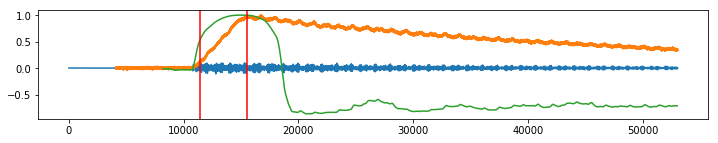

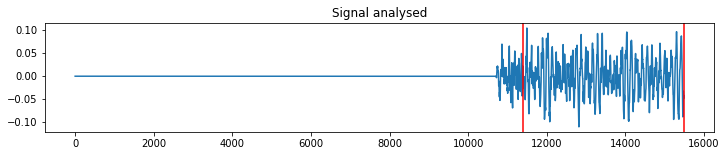

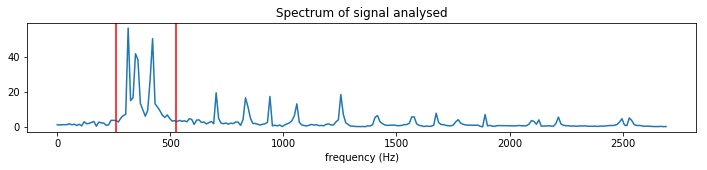

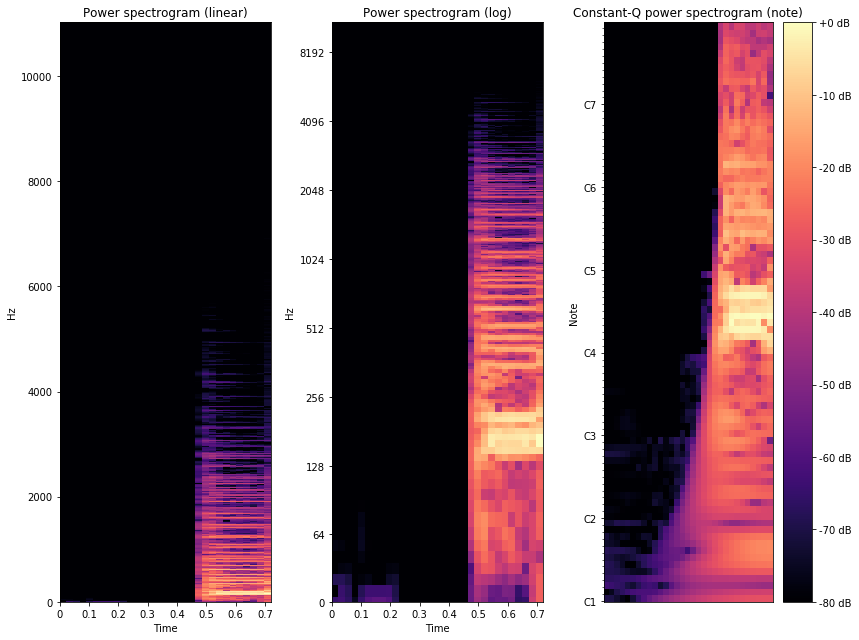

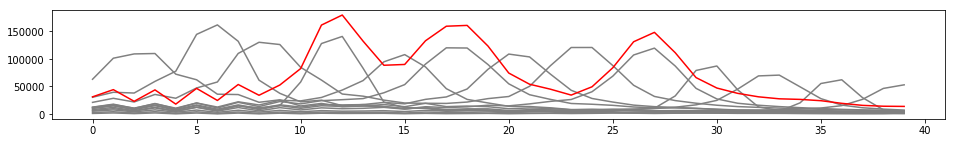

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5552.
Date:                Sun, 13 May 2018   Prob (F-statistic):           6.18e-44
Time:                        01:24:29   Log-Likelihood:                -354.82
No. Observations:                  40   AIC:                             733.6
Df Residuals:                      28   BIC:                             753.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0085      0.012     -0.725      0.4

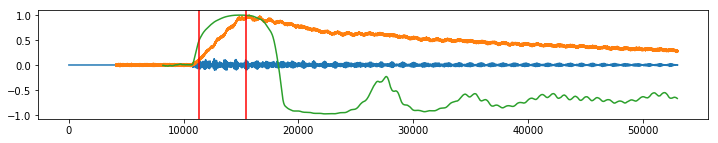

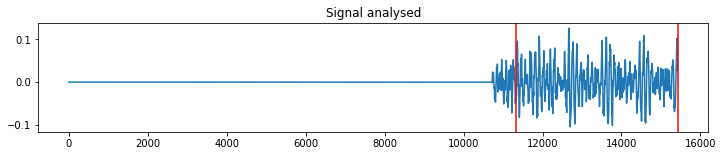

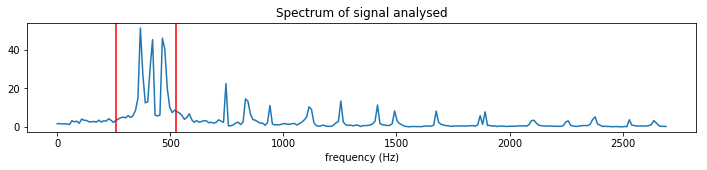

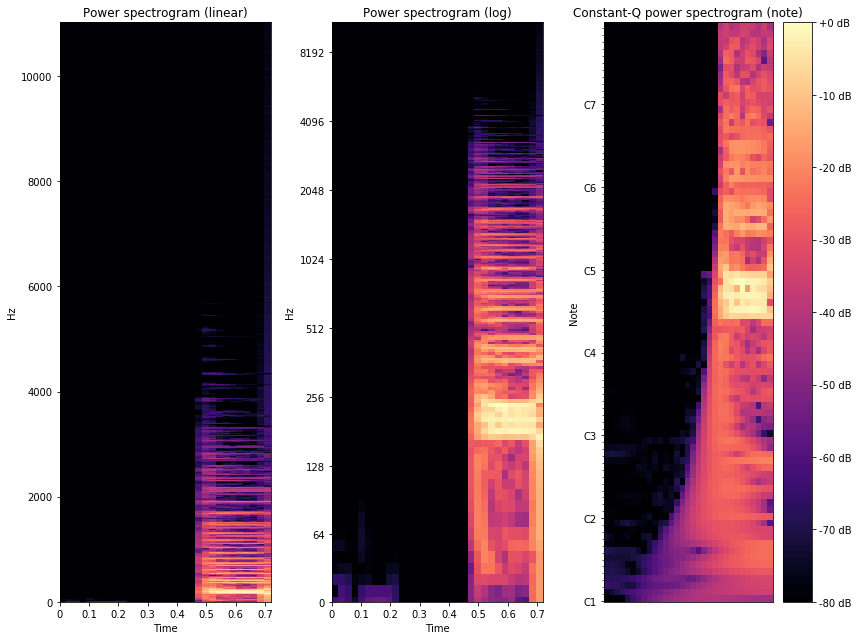

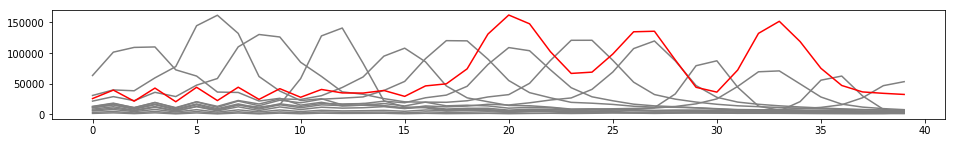

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     544.3
Date:                Sun, 13 May 2018   Prob (F-statistic):           7.60e-30
Time:                        01:24:35   Log-Likelihood:                -398.05
No. Observations:                  40   AIC:                             820.1
Df Residuals:                      28   BIC:                             840.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.0152      0.035      0.442      0.6

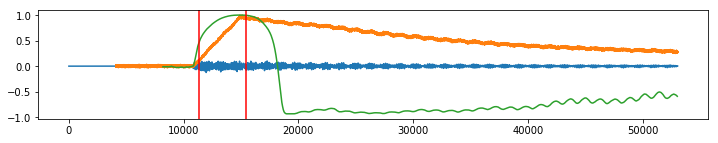

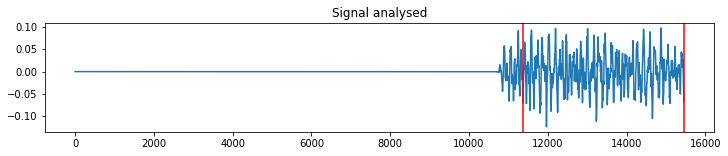

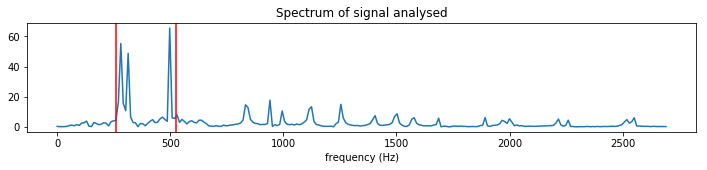

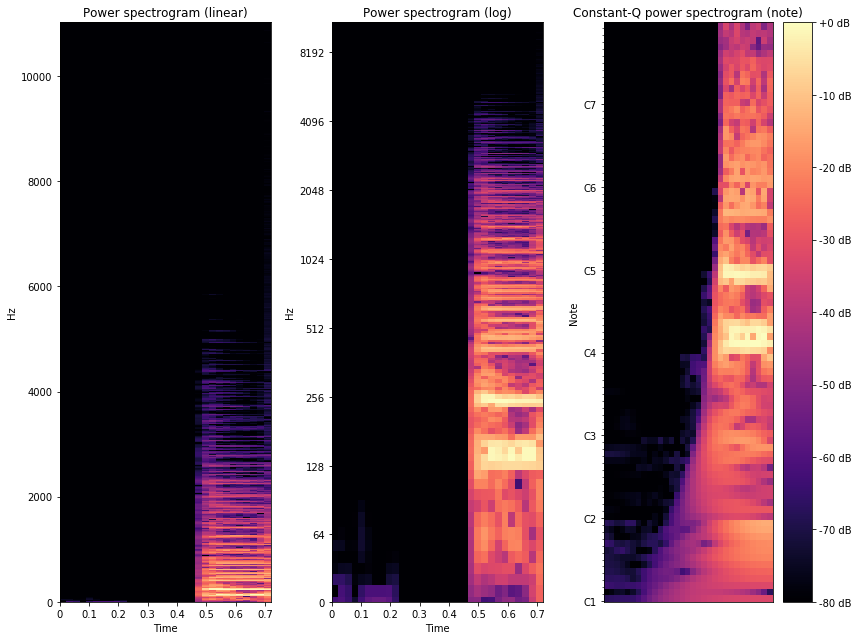

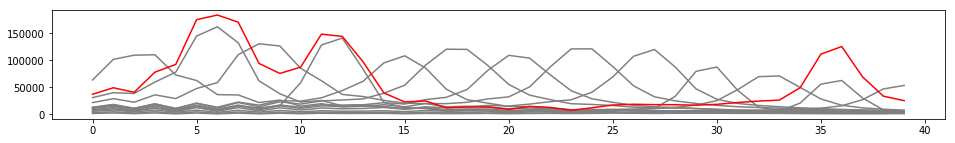

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     728.5
Date:                Sun, 13 May 2018   Prob (F-statistic):           1.31e-31
Time:                        01:24:41   Log-Likelihood:                -391.34
No. Observations:                  40   AIC:                             806.7
Df Residuals:                      28   BIC:                             827.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0234      0.029     -0.803      0.4

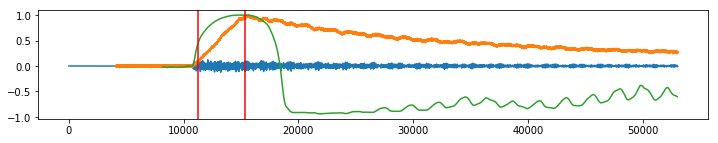

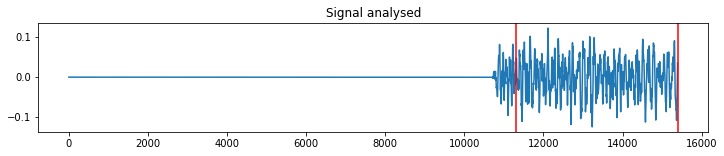

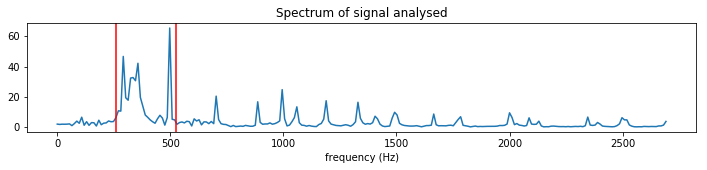

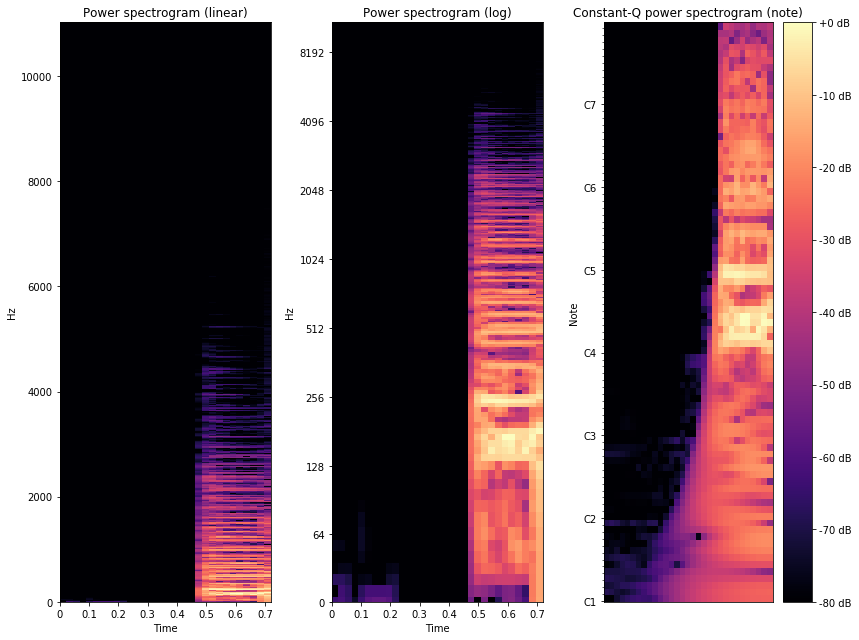

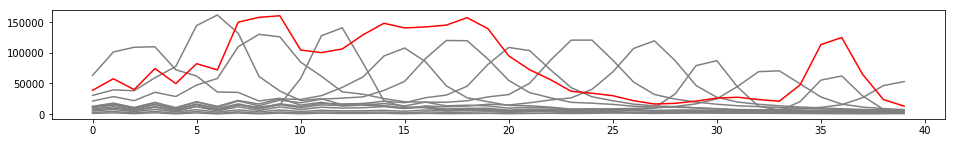

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     325.9
Date:                Sun, 13 May 2018   Prob (F-statistic):           9.48e-27
Time:                        01:24:48   Log-Likelihood:                -414.87
No. Observations:                  40   AIC:                             853.7
Df Residuals:                      28   BIC:                             874.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0120      0.053     -0.228      0.8

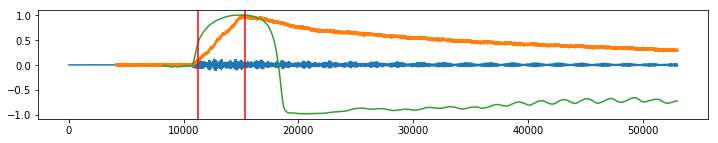

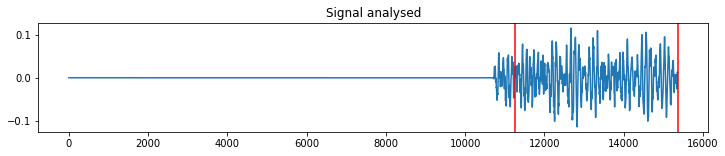

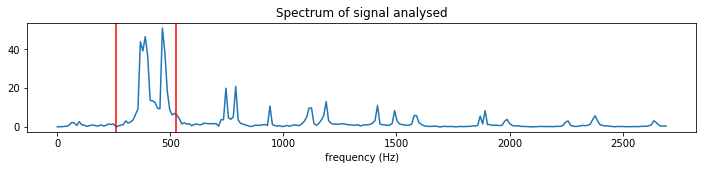

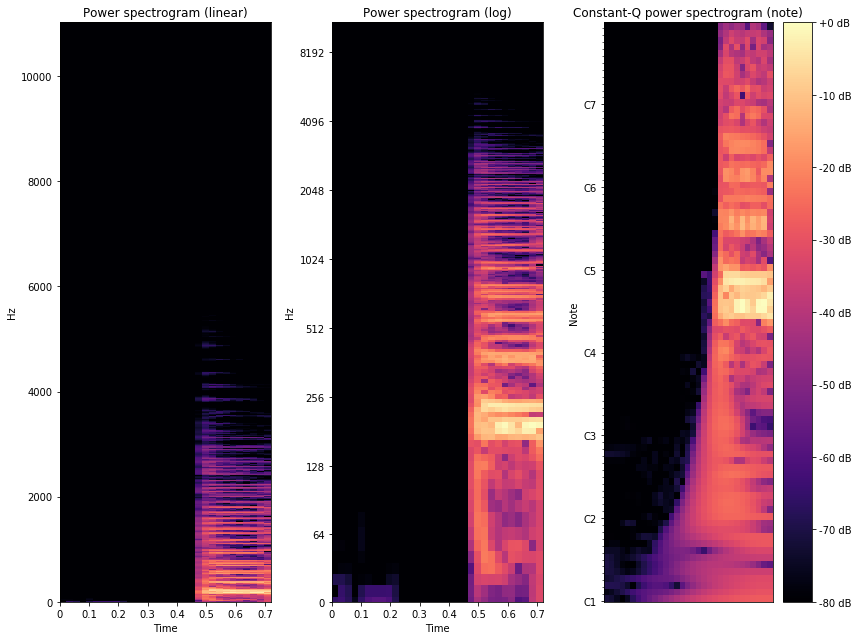

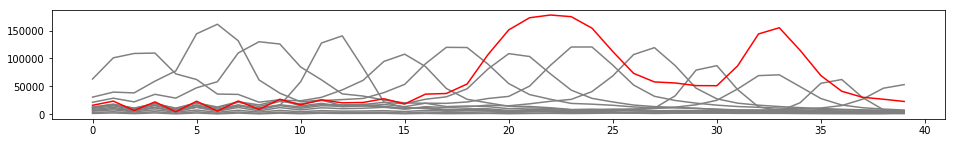

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1094.
Date:                Sun, 13 May 2018   Prob (F-statistic):           4.50e-34
Time:                        01:24:55   Log-Likelihood:                -386.09
No. Observations:                  40   AIC:                             796.2
Df Residuals:                      28   BIC:                             816.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.1143      0.026     -4.467      0.0

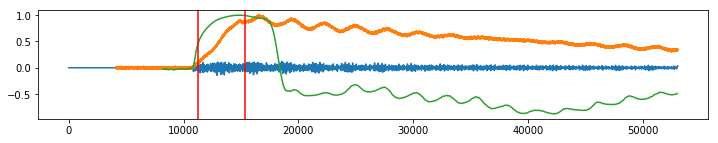

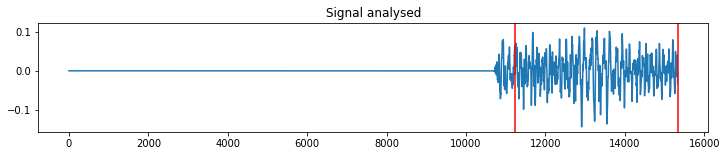

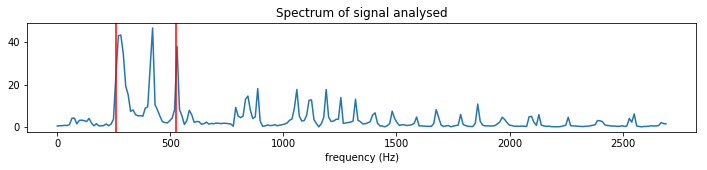

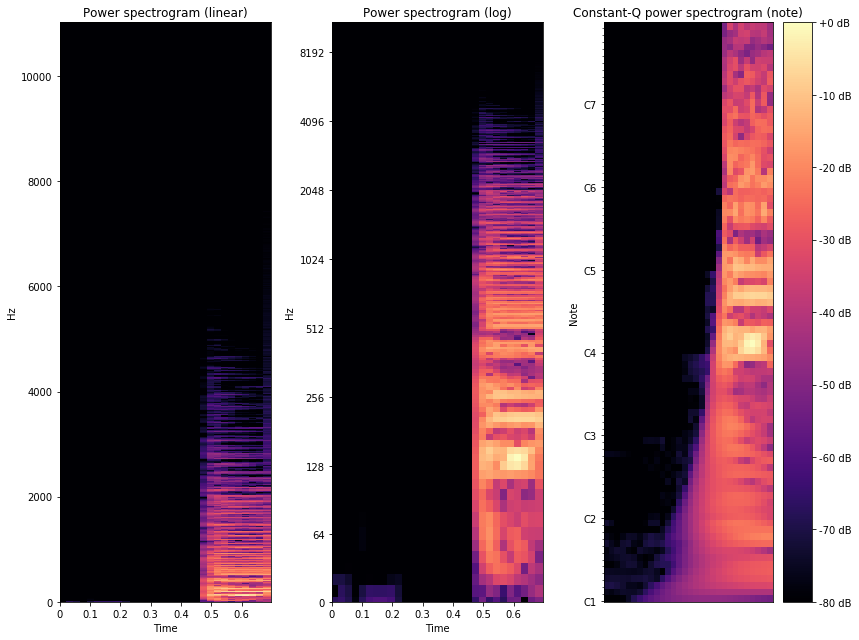

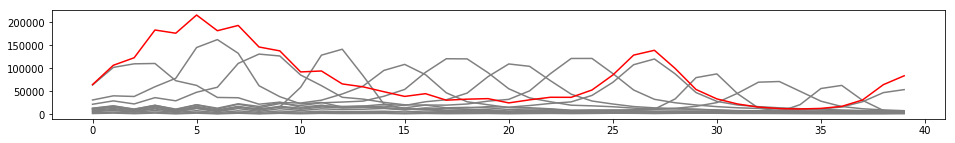

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     145.0
Date:                Sun, 13 May 2018   Prob (F-statistic):           6.76e-22
Time:                        01:25:01   Log-Likelihood:                -432.29
No. Observations:                  40   AIC:                             888.6
Df Residuals:                      28   BIC:                             908.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.8154      0.081     10.039      0.0

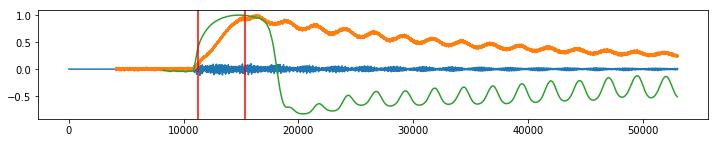

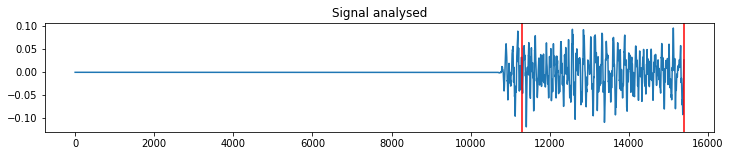

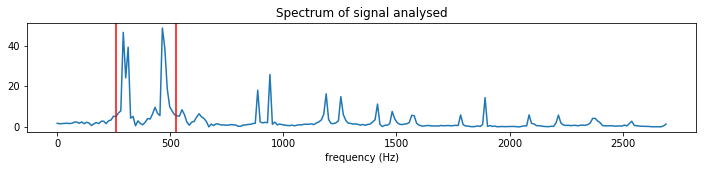

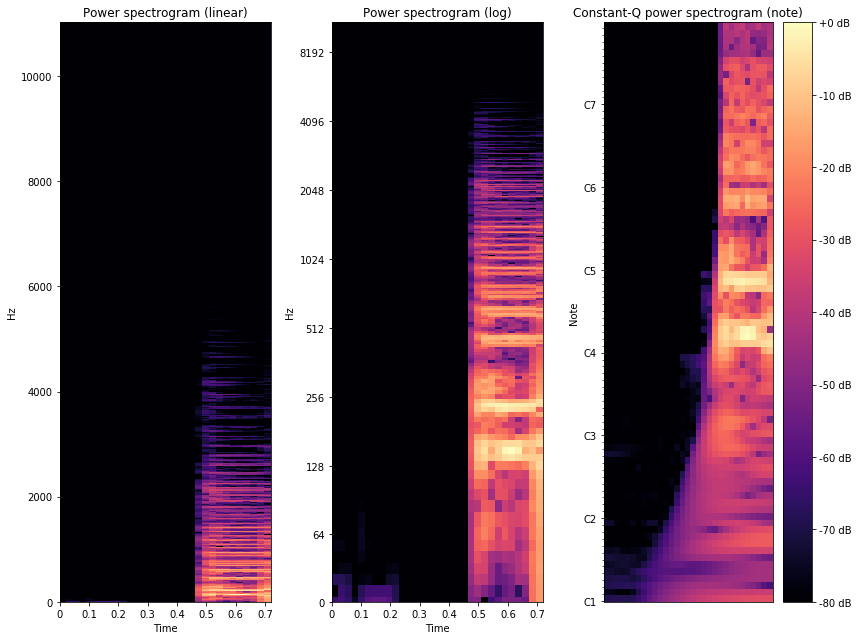

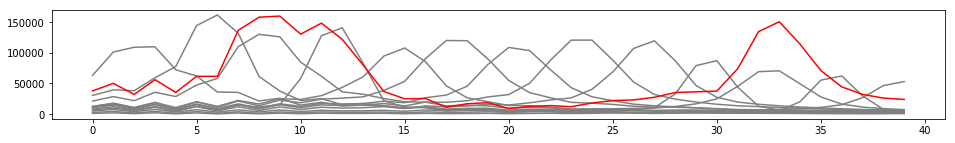

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     912.8
Date:                Sun, 13 May 2018   Prob (F-statistic):           5.64e-33
Time:                        01:25:08   Log-Likelihood:                -386.33
No. Observations:                  40   AIC:                             796.7
Df Residuals:                      28   BIC:                             816.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.0403      0.026      1.565      0.1

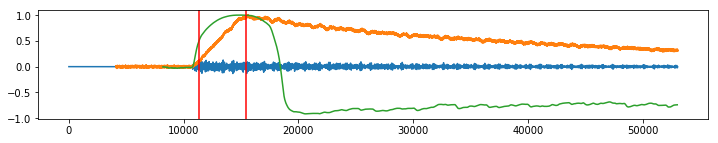

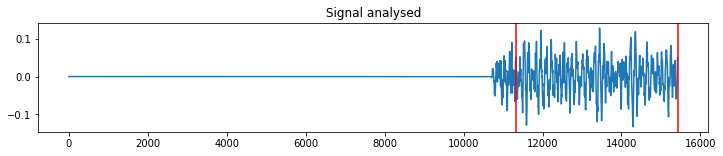

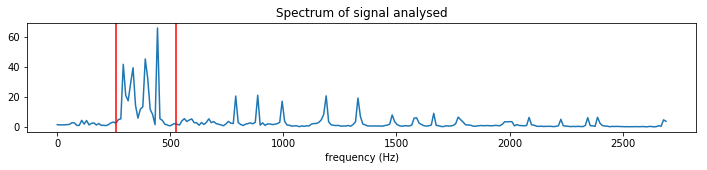

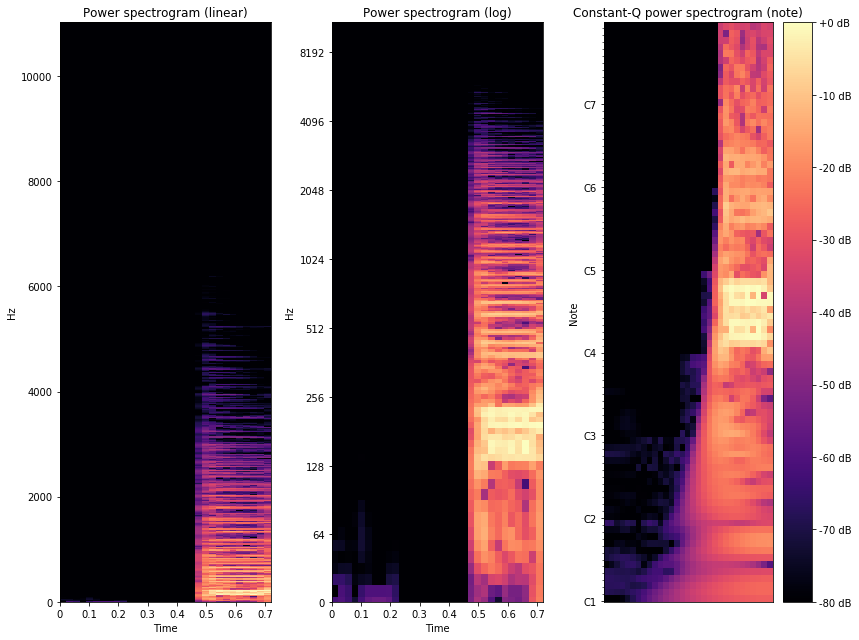

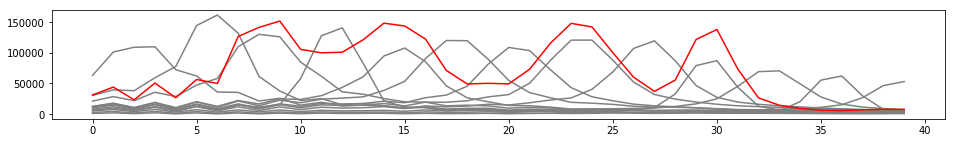

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1699.
Date:                Sun, 13 May 2018   Prob (F-statistic):           9.61e-37
Time:                        01:25:14   Log-Likelihood:                -380.14
No. Observations:                  40   AIC:                             784.3
Df Residuals:                      28   BIC:                             804.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.1237      0.022     -5.607      0.0

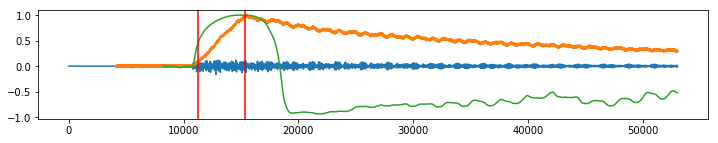

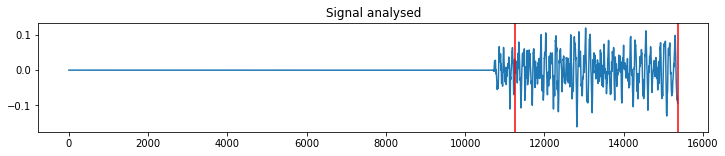

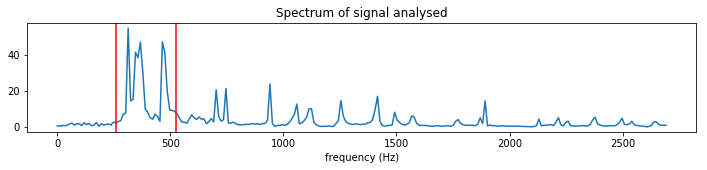

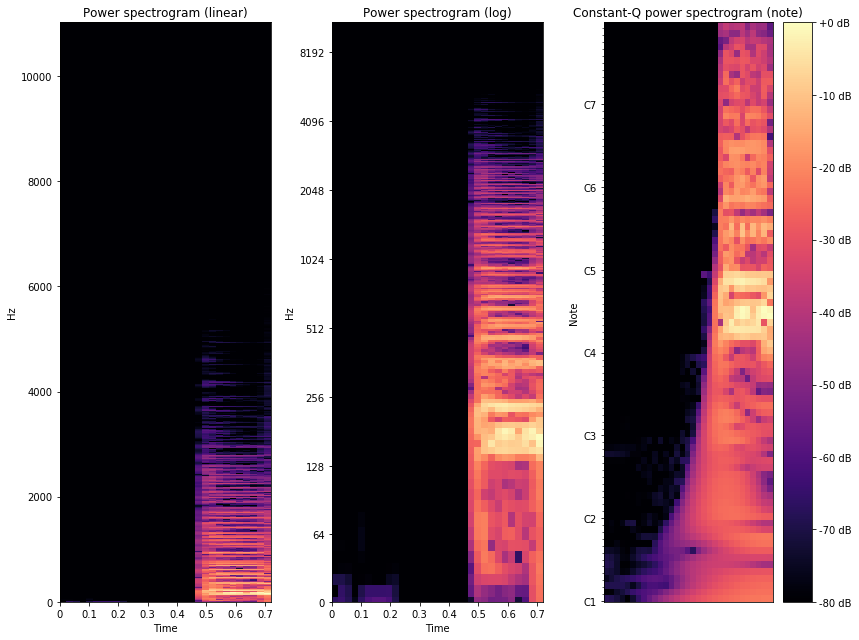

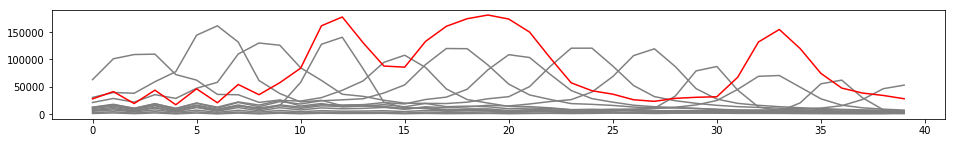

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     808.3
Date:                Sun, 13 May 2018   Prob (F-statistic):           3.07e-32
Time:                        01:25:21   Log-Likelihood:                -398.40
No. Observations:                  40   AIC:                             820.8
Df Residuals:                      28   BIC:                             841.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0632      0.035     -1.816      0.0

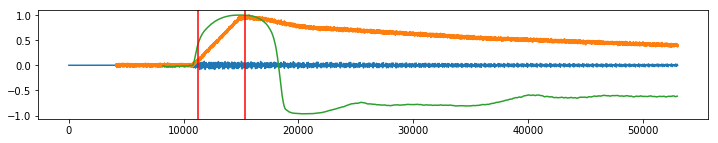

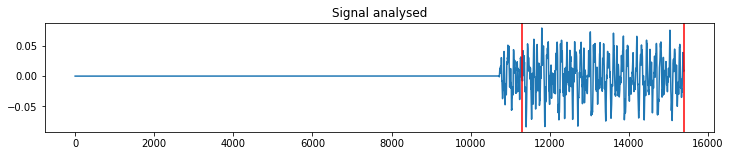

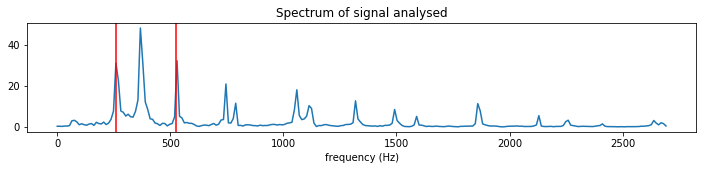

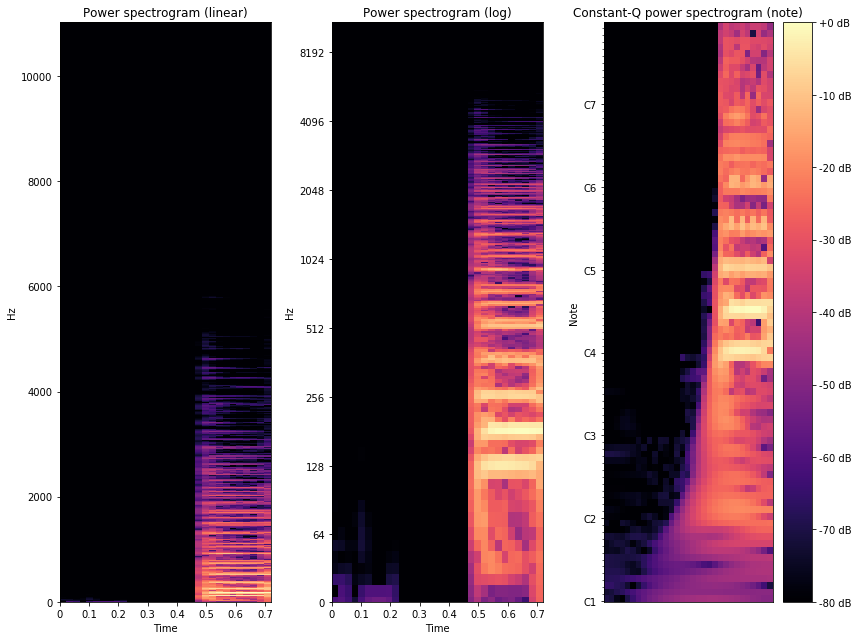

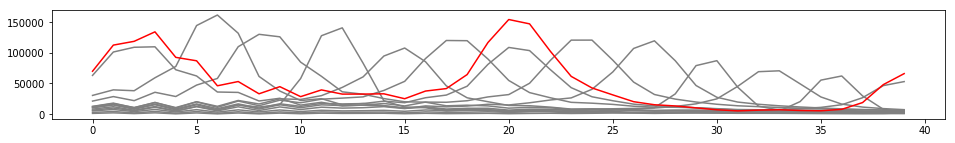

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1050.
Date:                Sun, 13 May 2018   Prob (F-statistic):           7.99e-34
Time:                        01:25:28   Log-Likelihood:                -378.14
No. Observations:                  40   AIC:                             780.3
Df Residuals:                      28   BIC:                             800.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              1.0085      0.021     48.075      0.0

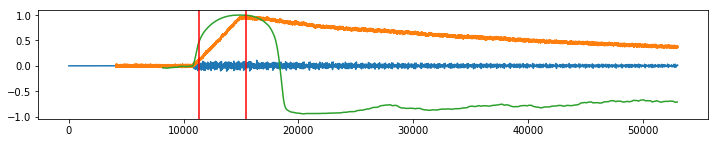

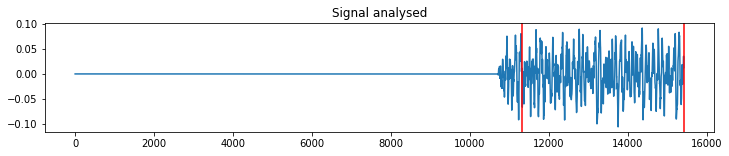

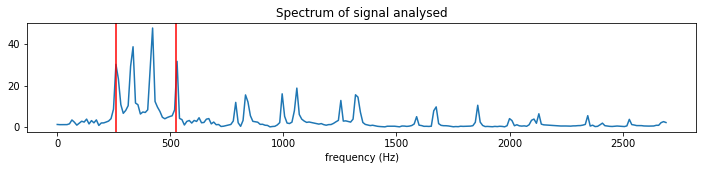

KeyboardInterrupt: 

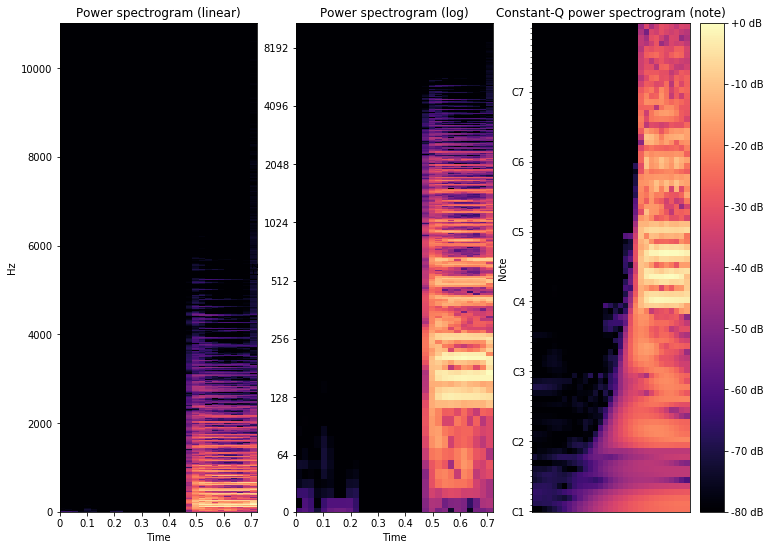

In [4]:
if __name__ == '__main__':
    test_function_accuracy(lg_regression, plotting=True, deleting=True)